In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Medicine Dataset/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [2]:
import pandas as pd

# Use raw string or double backslashes in the file path
df = pd.read_csv('/kaggle/input/medicine-dataset/medicine_dataset.csv')
# Call describe() method to get summary statistics and print the result
print(df.head())


           Name      Category Dosage Form Strength  \
0   Acetocillin  Antidiabetic       Cream   938 mg   
1  Ibuprocillin     Antiviral   Injection   337 mg   
2    Dextrophen    Antibiotic    Ointment   333 mg   
3   Clarinazole    Antifungal       Syrup   362 mg   
4   Amoxicillin    Antifungal      Tablet   802 mg   

                          Manufacturer Indication    Classification  
0                     Roche Holding AG      Virus  Over-the-Counter  
1                          CSL Limited  Infection  Over-the-Counter  
2                    Johnson & Johnson      Wound      Prescription  
3                          AbbVie Inc.       Pain      Prescription  
4  Teva Pharmaceutical Industries Ltd.      Wound  Over-the-Counter  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            50000 non-null  object
 1   Category        50000 non-null  object
 2   Dosage Form     50000 non-null  object
 3   Strength        50000 non-null  object
 4   Manufacturer    50000 non-null  object
 5   Indication      50000 non-null  object
 6   Classification  50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB
None


In [4]:
new_df=df.dropna()
print(new_df)
#dropping null vales

               Name      Category Dosage Form Strength  \
0       Acetocillin  Antidiabetic       Cream   938 mg   
1      Ibuprocillin     Antiviral   Injection   337 mg   
2        Dextrophen    Antibiotic    Ointment   333 mg   
3       Clarinazole    Antifungal       Syrup   362 mg   
4       Amoxicillin    Antifungal      Tablet   802 mg   
...             ...           ...         ...      ...   
49995  Dextronazole     Analgesic    Ointment   405 mg   
49996    Ibuprophen    Antiseptic      Tablet   633 mg   
49997     Dextrovir    Antibiotic   Injection   327 mg   
49998  Dextrostatin    Antibiotic     Inhaler   885 mg   
49999       Dolomet   Antipyretic    Ointment   426 mg   

                              Manufacturer Indication    Classification  
0                         Roche Holding AG      Virus  Over-the-Counter  
1                              CSL Limited  Infection  Over-the-Counter  
2                        Johnson & Johnson      Wound      Prescription  
3      

In [5]:
print(df.duplicated())
#returns true if it conatins duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool


In [6]:

#checking null vales if any
print(df.isnull())

        Name  Category  Dosage Form  Strength  Manufacturer  Indication  \
0      False     False        False     False         False       False   
1      False     False        False     False         False       False   
2      False     False        False     False         False       False   
3      False     False        False     False         False       False   
4      False     False        False     False         False       False   
...      ...       ...          ...       ...           ...         ...   
49995  False     False        False     False         False       False   
49996  False     False        False     False         False       False   
49997  False     False        False     False         False       False   
49998  False     False        False     False         False       False   
49999  False     False        False     False         False       False   

       Classification  
0               False  
1               False  
2               False  
3  

In [7]:
def is_nan_or_empty(cell):
    return pd.isna(cell) or cell == ''

# Apply the function to the DataFrame and sum the results
empty_cells = df.applymap(is_nan_or_empty).sum()
print(empty_cells)

#checking whether the dataset as empty cells and empty strings are present in dataset

/tmp/ipykernel_18/2542339299.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_cells = df.applymap(is_nan_or_empty).sum()


Name              0
Category          0
Dosage Form       0
Strength          0
Manufacturer      0
Indication        0
Classification    0
dtype: int64


Category
Analgesic         6340
Antibiotic        6066
Antidepressant    6354
Antidiabetic      6171
Antifungal        6289
Antipyretic       6280
Antiseptic        6315
Antiviral         6185
Name: Strength, dtype: int64


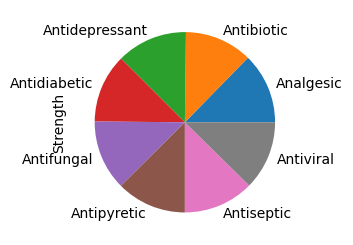

In [8]:
#pie chart
import matplotlib.pyplot as plt

x=df.groupby('Category')['Strength'].count()
print(x)
plt.subplot(1, 2, 1)

x.plot(kind='pie').limit=5



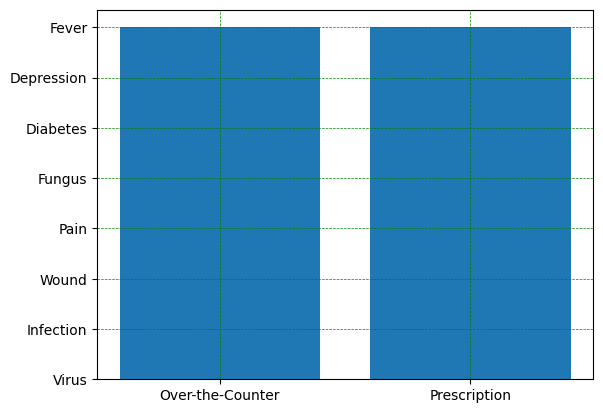

In [9]:

#bar chart
x=df['Classification']
y=df['Indication']
plt.bar(x,y).limit=2
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.show()


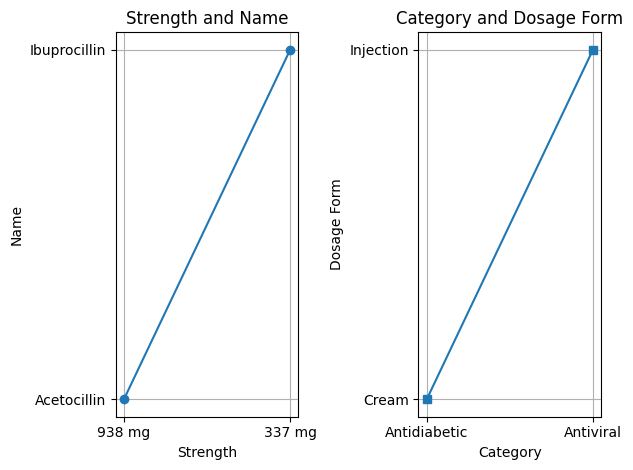

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `df` is your DataFrame containing the data

# Subplot 1: Strength vs Name
plt.subplot(1, 2, 1)
x1 = df['Strength'].head(2)
y1 = df['Name'].head(2)
plt.plot(x1, y1, marker='o')
plt.title("Strength and Name")
plt.xlabel("Strength")
plt.ylabel("Name")
plt.grid()

# Subplot 2: Category vs Dosage Form
plt.subplot(1, 2, 2)
x2 = df['Category'].head(2)
y2 = df['Dosage Form'].head(2)  
plt.plot(x2, y2, marker='s')  
plt.title("Category and Dosage Form")
plt.xlabel("Category")
plt.ylabel("Dosage Form")
plt.grid()

plt.tight_layout()  # Ensures plots do not overlap
plt.show()
